In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
data1 = {
    "Screen_Size": [5.0, 5.2, 5.5, 5.8, 6.0, 6.2, 6.4, 6.5, 6.7, 6.8],
    "Battery_Capacity": [3000, 3200, 3500, 3700, 4000, 4200, None, 4500, 4800, 5000],
    "Camera_Resolution": [12, 16, 20, None, 24, 32, 48, 64, 108, 200],
    "Price": [250, 300, 350, 400, 450, 500, 550, 600, 700, 800]
}
df1=pd.DataFrame(data1);
print(df1)


   Screen_Size  Battery_Capacity  Camera_Resolution  Price
0          5.0            3000.0               12.0    250
1          5.2            3200.0               16.0    300
2          5.5            3500.0               20.0    350
3          5.8            3700.0                NaN    400
4          6.0            4000.0               24.0    450
5          6.2            4200.0               32.0    500
6          6.4               NaN               48.0    550
7          6.5            4500.0               64.0    600
8          6.7            4800.0              108.0    700
9          6.8            5000.0              200.0    800


In [4]:
df1.isnull().sum() # Check for missing values in each column


Screen_Size          0
Battery_Capacity     1
Camera_Resolution    1
Price                0
dtype: int64

In [5]:
df1.fillna(df1.mean(),inplace=True)
print("\nAfter handling missing values:\n",df1)


After handling missing values:
    Screen_Size  Battery_Capacity  Camera_Resolution  Price
0          5.0       3000.000000          12.000000    250
1          5.2       3200.000000          16.000000    300
2          5.5       3500.000000          20.000000    350
3          5.8       3700.000000          58.222222    400
4          6.0       4000.000000          24.000000    450
5          6.2       4200.000000          32.000000    500
6          6.4       3988.888889          48.000000    550
7          6.5       4500.000000          64.000000    600
8          6.7       4800.000000         108.000000    700
9          6.8       5000.000000         200.000000    800


TRAIN-TEST-SPLIT

In [6]:
X=df1[["Screen_Size", "Battery_Capacity", "Camera_Resolution"]]
y=df1[["Price"]]
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [7]:
#Model Training
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)



In [9]:
print("predict", y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R^2 Score:",r2)


predict [[275.65539239]
 [343.90646817]]
Mean Squared Error: 314.89552495376665
R^2 Score: 0.4961671600739733


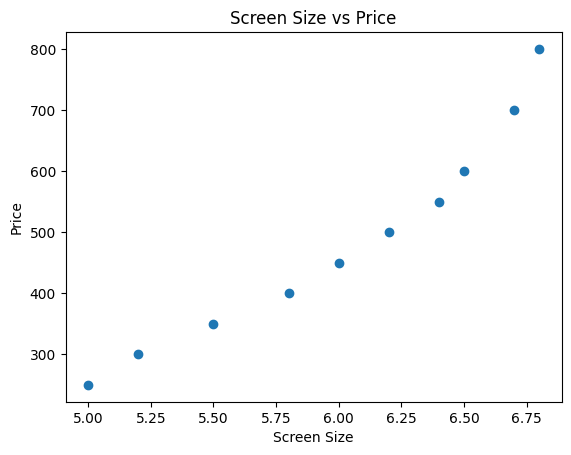

In [11]:
plt.scatter(df1["Screen_Size"],df1["Price"])
plt.xlabel("Screen Size")
plt.ylabel("Price")
plt.title("Screen Size vs Price")
plt.show()


Problem 2: Subscription Prediction
Accuracy: 1.0
[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



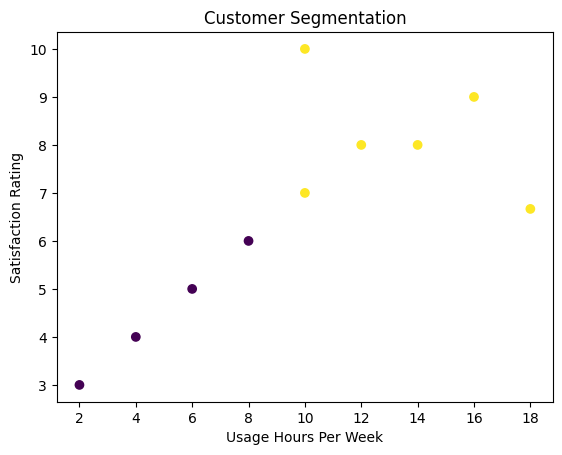

In [15]:
data2 = {
    "Usage_Hours_per_Week": [2, 4, 6, 8, 10, 12, 14, 16, 18, None],
    "Satisfaction_Rating": [3, 4, 5, 6, 7, 8, 8, 9, None, 10],
    "Subscribed": ["No", "No", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"]
}

df2 = pd.DataFrame(data2)

# Handle missing values
df2.fillna(df2.mean(numeric_only=True), inplace=True)

# Encode target variable
df2["Subscribed"] = df2["Subscribed"].map({"No": 0, "Yes": 1})

# Split
X2 = df2[["Usage_Hours_per_Week", "Satisfaction_Rating"]]
y2 = df2["Subscribed"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

print("\nProblem 2: Subscription Prediction")
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

# Visualization
plt.scatter(df2["Usage_Hours_per_Week"], df2["Satisfaction_Rating"], c=df2["Subscribed"])
plt.xlabel("Usage Hours Per Week")
plt.ylabel("Satisfaction Rating")
plt.title("Customer Segmentation")
plt.show()
